In [1]:
import pandas as pd # IMPORTANDO A BIBLIOTECA PANDAS PARA MANIPULAÇÃO DE DADOS
import numpy as np # IMPORTANDO A BIBLIOTECA NUMPY PARA CÁLCULOS MATEMÁTICOS
import matplotlib.pyplot as plt # IMPORTANDO A BIBLIOTECA MATPLOTLIB PARA VISUALIZAÇÃO DE DADOS
import seaborn as sns # IMPORTANDO A BIBLIOTECA SEABORN PARA VISUALIZAÇÃO DE DADOS

In [2]:
df = pd.read_csv('heart-disease.csv') # LENDO O ARQUIVO CSV E ATRIBUINDO A VARIÁVEL DF
df.head() # MOSTRANDO AS 5 PRIMEIRAS LINHAS DO DATAFRAME

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Evaluation
Se conseguirmos atingir 95% de precisão em prever se um paciente tem ou não uma doença cadíaca durante o desenvolvimento do modelo, ai continuaremos nosso projeto.

## Atributos

age: idade em anos

sex: sexo (1 = masculino; 0 = feminino)

cp: (chest pain type)

0: angina típica (dor no peito típica)

1: angina atípica (dor no peito, não relacionada ao coração)

2: dor não anginosa (espasmos, não relacionados ao coração)

3: assintomático (dor torácica, sem sinais de doença)

trestbps: pressão arterial em repouso (valores entre 130-140 é motivo de preocupação)

chol: colesterol em mg/dl (acima de 200 é motivo de preocupação)

fbs: glicemia em jejum > 120mg/dl (1=verdadeiro; 0=falso) (>126mg/dl sinal de diabetes)

restecg: resultados eletro. em repouso (0=normal; 1=anormalidade, 2=hipertrofia ventricular)

thalach: frequência cardíaca máxima

exang: dor induzida pelo exercício (1=sim;0=não)

oldpeak: depressão induzida pelo exercício (observa o estresse do coração durante o exercício)

slope: inclinação do segmento do exercício (0=ascendente;1=plano;2=descida)

ca: número de vasos principais (0-3) coloridos por fluoroscopia (vaso colorido significa que o médico pode ver o sangue passando)

thal: resultado do estresse de tálio (0=normal;1=defeito corrigido;2=defeito reversível)

condition: 0=sem doença; 1=doença

## EDA

<Axes: xlabel='target'>

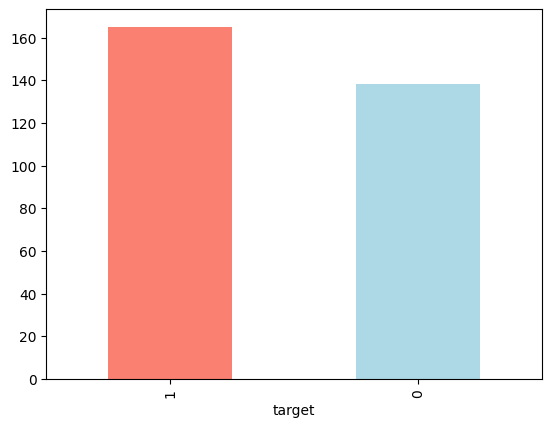

In [3]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']) # 1 - CONTANDO COM VALUE CONTS(PANDAS)
                                                                            # 2 -  MOSTRANDO A FREQUÊNCIA DE DOENÇA CARDÍACA(TARGET) COM PLOT(MATPLOTLIB) 
                                                                            # 3 - KIND É O TIPO DE GRAFICO (BARRAS)

In [4]:
df.info() # MOSTRANDO INFORMAÇÕES DO DATAFRAME PARA VER SE TEM VALORES NULOS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
pd.crosstab(df['target'], df['sex']) # CROSSTAB É USADO PARA CRUZAR DUAS COLUNAS, E MOSTRAR A FREQUÊNCIA DE DOENÇA CARDÍACA EM FUNÇÃO DO SEXO

sex,0,1
target,,
0,24,114
1,72,93


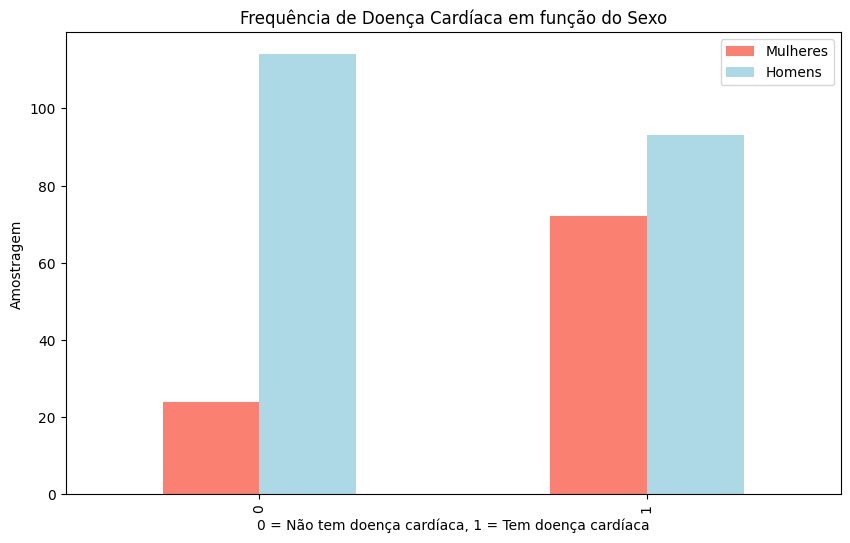

In [6]:
pd.crosstab(df['target'], df['sex']).plot(kind='bar', # CROSSTAB PARA VER A FREQUÊNCIA DE DOENÇA CARDÍACA EM FUNÇÃO DO SEXO
                                         figsize=(10,6), # TAMANHO DA FIGURA
                                         color=['salmon', 'lightblue'])
plt.title("Frequência de Doença Cardíaca em função do Sexo") # TÍTULO DO GRÁFICO
plt.xlabel("0 = Não tem doença cardíaca, 1 = Tem doença cardíaca") # LEGENDAS DO EIXO X
plt.ylabel("Amostragem") # LEGENDAS DO EIXO Y
plt.legend(["Mulheres", "Homens"]) # LEGENDAS DAS BARRAS

Text(0, 0.5, 'Frequência Cardíaca Máxima')

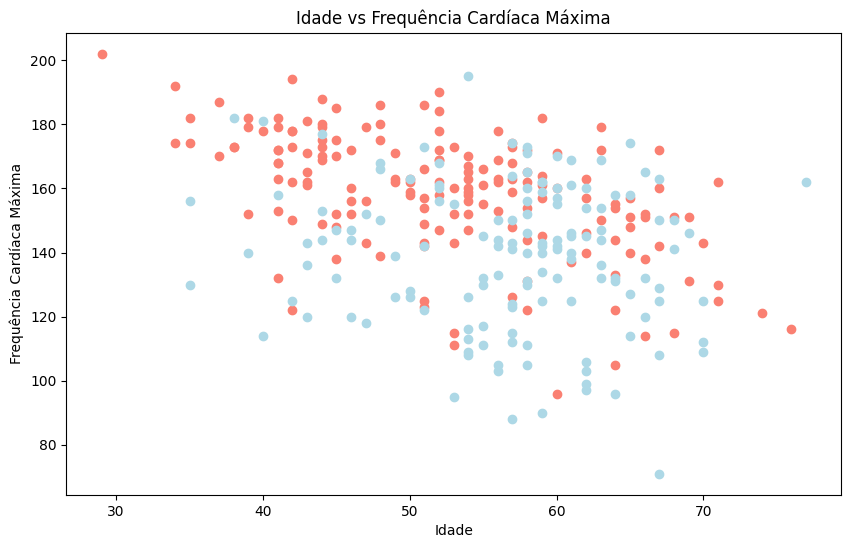

In [7]:
plt.figure(figsize=(10,6))

#plot para valores positivos
plt.scatter(df['age'][df.target==1], # SCATTER PLOT PARA FAZER UM GRÁFICO DE DISPERSÃO
            df['thalach'][df.target==1], # PLOTANDO A IDADE (AGE) E A FREQUÊNCIA CARDÍACA MÁXIMA (THALACH)  
            c='salmon') # COR SALMON PARA VALORES POSITIVOS (COM DOENÇA CARDÍACA)
#plot para valores negativos 
plt.scatter(df['age'][df.target==0], # SCATTER PLOT PARA FAZER UM GRÁFICO DE DISPERSÃO
            df['thalach'][df.target==0], # PLOTANDO A IDADE (AGE) E A FREQUÊNCIA CARDÍACA MÁXIMA (THALACH)
            c='lightblue') 
plt.title("Idade vs Frequência Cardíaca Máxima") # TÍTULO DO GRÁFICO
plt.xlabel("Idade") # LEGENDAS DO EIXO X
plt.ylabel("Frequência Cardíaca Máxima") # LEGENDAS DO EIXO Y

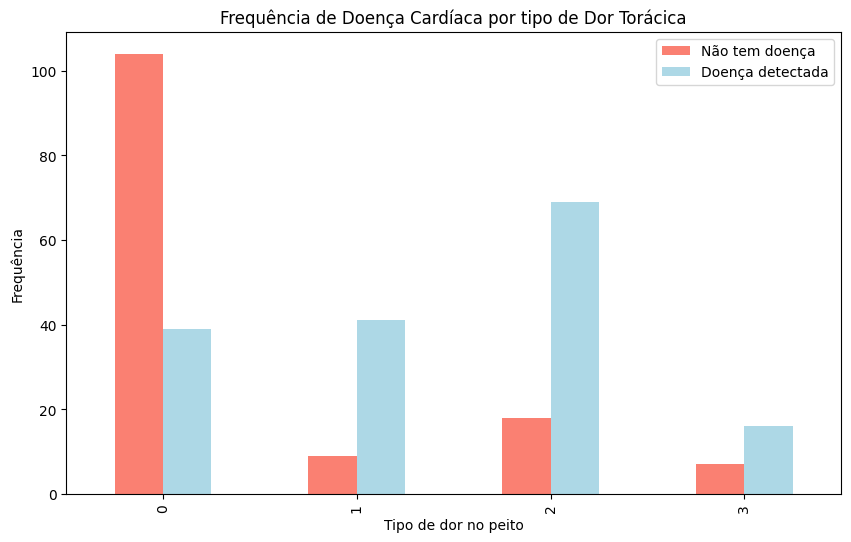

In [8]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', # CROSSTAB PARA VER A FREQUÊNCIA DE DOENÇA, CROSSTAB É USADO PARA CRUZAR DUAS COLUNAS
                                            figsize=(10,6), # TAMANHO DA FIGURA
                                            color=['salmon', 'lightblue'])
plt.title('Frequência de Doença Cardíaca por tipo de Dor Torácica')
plt.xlabel('Tipo de dor no peito')
plt.ylabel('Frequência')
plt.legend(["Não tem doença", "Doença detectada"])

cp(dor no peito)

0(típica dor no peito)

1(dor no peito, não relacionada ao coração)

2(espasmos, não relacionados ao coração)

3(dor torácica, sem sinais de doença)

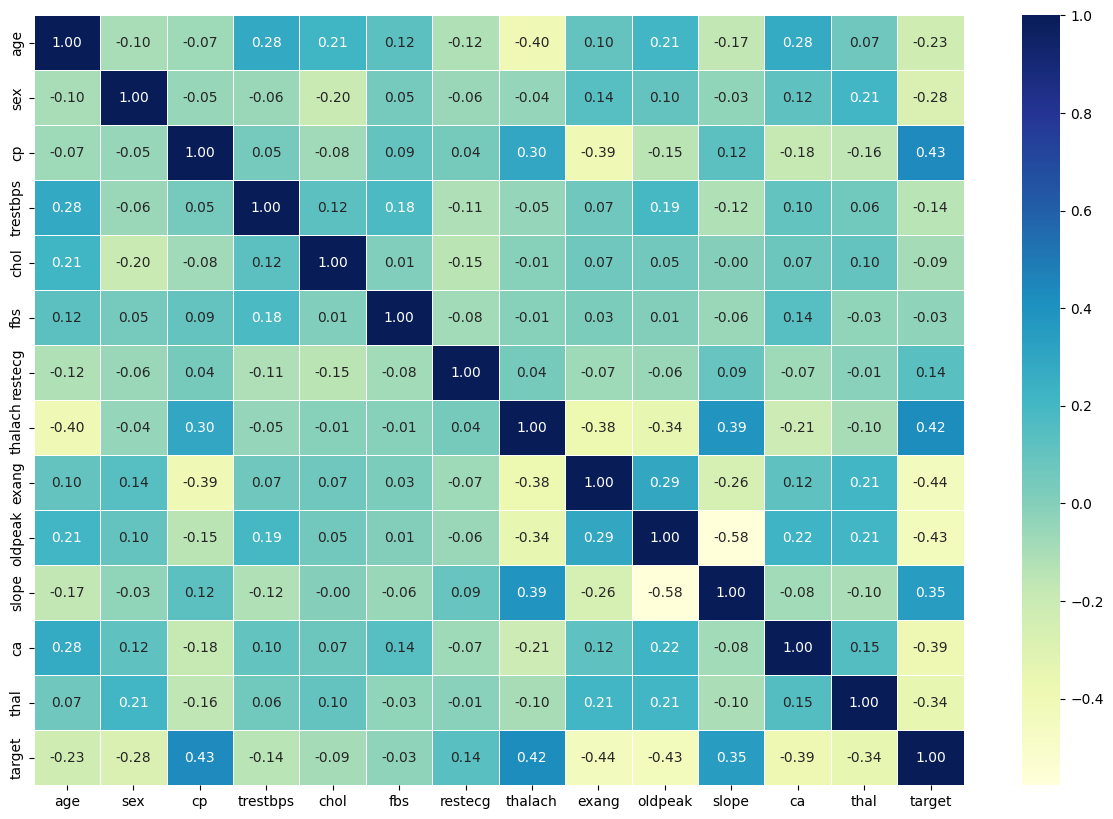

In [9]:
corr_matrix = df.corr() # MATRIZ DE CORRELAÇÃO PARA VER A RELAÇÃO ENTRE AS VARIÁVEIS, USANDO O MÉTODO CORR DO PANDAS
plt.figure(figsize=(15,10)) #PLOTA O GRÁFICO COM FIGURE DO MATPLOTLIB
sns.heatmap(corr_matrix,# HEATMAP PARA VER A MATRIZ DE CORRELAÇÃO, USANDO A BIBLIOTECA SEABORN
            annot=True, # MOSTRA OS NÚMEROS NA MATRIZ
            linewidths=0.5, # LARGURA DAS LINHAS
             fmt=".2f", # FORMATO DOS NÚMEROS
                         cmap='YlGnBu');# PALETA DE CORES

## Modelagem dos Dados

In [10]:
X = df.drop('target', axis=1) # VARIÁVEL INDEPENDENTE, DROPA A COLUNA TARGET, QUE É A VARIÁVEL DEPENDENTE, DROPAR É REMOVER, AXIS=1 É PARA REMOVER COLUNA, AXIS=0 É PARA REMOVER LINHA
y = df['target'] # VARIÁVEL DEPENDENTE, QUE É A COLUNA TARGET   

In [11]:
X.head() # MOSTRANDO AS 5 PRIMEIRAS LINHAS DA VARIÁVEL INDEPENDENTE

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [12]:
y.head() # MOSTRANDO AS 5 PRIMEIRAS LINHAS DA VARIÁVEL DEPENDENTE

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## Treino e Teste

In [13]:
from sklearn.model_selection import train_test_split # IMPORTANDO A FUNÇÃO TRAIN_TEST_SPLIT PARA DIVIDIR OS DADOS EM TREINO E TESTE

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # DIVIDINDO OS DADOS EM TREINO E TESTE, TEST_SIZE=0.2 SIGNIFICA QUE 20% DOS DADOS SERÃO USADOS PARA TESTE E 80% PARA TREINO
                                                                         # POR PADRÃO, O TRAIN_TEST_SPLIT FAZ A DIVISÃO DE FORMA ALEATÓRIA

In [15]:
from sklearn.linear_model import LogisticRegression # IMPORTANDO O MODELO DE REGRESSÃO LOGÍSTICA DO SKLEARN
from sklearn.neighbors import KNeighborsClassifier # IMPORTANDO O MODELO DE KNN DO SKLEARN
from sklearn.ensemble import RandomForestClassifier # IMPORTANDO O MODELO DE RANDOM FOREST DO SKLEARN

In [16]:
models = {"KNN": KNeighborsClassifier(), # DICIONÁRIO COM OS MODELOS QUE SERÃO TESTADOS # MODELO DE KNN
          "Logistic Regression": LogisticRegression(), # MODELO DE REGRESSÃO LOGÍSTICA
          "Random Forest": RandomForestClassifier()} # MODELO DE RANDOM FOREST

def fit_and_score(models, X_train, X_test, y_train, y_test): # FUNÇÃO PARA TREINAR E AVALIAR OS MODELOS:

    model_scores = {} # DICIONÁRIO PARA ARMAZENAR AS PRECISÕES DOS MODELOS

    for name, model in models.items(): # ITERANDO SOBRE O DICIONÁRIO DE MODELOS COM .ITEMS() QUE É UM MÉTODO DE DICIONÁRIO QUE RETORNA AS CHAVES E VALORES
        model.fit(X_train, y_train) # TREINANDO O MODELO

        model_scores[name] = model.score(X_test, y_test) # AVALIANDO O MODELO E ARMAZENANDO A PRECISÃO NO DICIONÁRIO

    return model_scores # RETORNANDO O DICIONÁRIO COM AS PRECISÕES DOS MODELOS

In [17]:
fit_and_score(models=models, # CHAMANDO A FUNÇÃO PARA TREINAR E AVALIAR OS MODELOS
              X_train=X_train, 
              X_test=X_test, 
              y_train=y_train, 
              y_test=y_test)

c:\Users\Arthur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6065573770491803,
 'Logistic Regression': 0.7868852459016393,
 'Random Forest': 0.8032786885245902}

## Ajuste de hiperparâmetros e validação cruzada

In [18]:
train_scores = [] # LISTA PARA ARMAZENAR AS PRECISÕES DE TREINO
test_scores = [] # LISTA PARA ARMAZENAR AS PRECISÕES DE TESTE

neighbors = range(1,21) # TESTANDO VALORES DE K DE 1 A 20

knn = KNeighborsClassifier() # INSTANCIANDO O MODELO DE KNN

for i in neighbors: # ITERANDO SOBRE OS VALORES DE K
    knn.set_params(n_neighbors=i) # DEFININDO O VALOR DE K

    knn.fit(X_train, y_train) # TREINANDO O MODELO
    
    train_scores.append(knn.score(X_train, y_train)) # AVALIANDO O MODELO NO CONJUNTO DE TREINO E ARMAZENANDO A PRECISÃO NA LISTA
    test_scores.append(knn.score(X_test, y_test)) # AVALIANDO O MODELO NO CONJUNTO DE TESTE E ARMAZENANDO A PRECISÃO NA LISTA

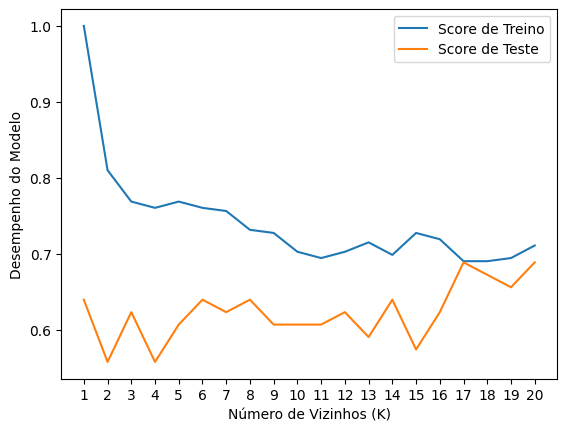

In [19]:
plt.plot(neighbors, train_scores, label='Score de Treino') # PLOTANDO A PRECISÃO DE TREINO
plt.plot(neighbors, test_scores, label='Score de Teste') # PLOTANDO A PRECISÃO DE TESTE
plt.xticks(np.arange(1,21,1)) # DEFININDO OS VALORES DO EIXO X
plt.xlabel("Número de Vizinhos (K)") # LEGENDAS DO EIXO
plt.ylabel("Desempenho do Modelo") # LEGENDAS DO EIXO Y
plt.legend(); # LEGENDAS DAS LINHAS

In [20]:
print(f"Desempenho máximo de KNN nos dados de teste: {max(test_scores)*100:.2f}%")

Desempenho máximo de KNN nos dados de teste: 68.85%


## RandomizedSearchCV

In [21]:
logread_grid = {"C": np.logspace(-4, 4, 20), # GERANDO 20 VALORES ENTRE 10^-4 E 10^4, USANDO A FUNÇÃO LOGSPACE DO NUMPY, E CRIANDO UM DICIONÁRIO PARA O HIPERPARÂMETRO C QUE É O PARÂMETRO DE REGULARIZAÇÃO DA REGRESSÃO LOGÍSTICA
                "solver": ['liblinear']} # SOLVER É O ALGORITMO USADO PARA OTIMIZAR A FUNÇÃO DE CUSTO, LIBLINEAR É BOM PARA PEQUENOS CONJUNTOS DE DADOS

rf_grid = {"n_estimators": np.arange(10, 1000, 50), # GERANDO VALORES DE 10 A 1000, COM PASSO DE 50, USANDO A FUNÇÃO ARANGE DO NUMPY}      
           "max_depth": [None, 3, 5, 10], # PROFUNDIDADE MÁXIMA DA ÁRVORE
           "min_samples_split": np.arange(2,20,2), # NÚMERO MÍNIMO DE AMOSTRAS NECESSÁRIAS PARA DIVIDIR UM NÓ
           "min_samples_leaf": [1, 20, 2]} # NÚMERO MÍNIMO DE AMOSTRAS NECESSÁRIAS PARA SER UMA FOLHA

In [22]:
from sklearn.model_selection import RandomizedSearchCV # IMPORTANDO A CLASSE RANDOMIZEDSEARCHCV PARA FAZER A BUSCA ALEATÓRIA

In [23]:
rscv_log_reg = RandomizedSearchCV(LogisticRegression(), # INSTANCIANDO A CLASSE RANDOMIZEDSEARCHCV, PASSANDO O MODELO DE REGRESSÃO LOGÍSTICA
                                  param_distributions=logread_grid, # PASSANDO O DICIONÁRIO DE HIPERPARÂMETROS
                                  cv=5, # NÚMERO DE FOLDS PARA VALIDAÇÃO CRUZADA
                                  n_iter=20,# NÚMERO DE COMBINAÇÕES DE HIPERPARÂMETROS A SEREM TESTADAS
                                  verbose=True) # MOSTRA O PROGRESSO DA BUSCA ALEATÓRIA

rscv_log_reg.fit(X_train, y_train) # TREINANDO O MODELO COM OS MELHORES HIPERPARÂMETROS

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [24]:
rscv_log_reg.best_params_ # MOSTRANDO OS MELHORES HIPERPARÂMETROS ENCONTRADOS PELA BUSCA ALEATÓRIA

{'solver': 'liblinear', 'C': np.float64(1.623776739188721)}

In [25]:
rscv_log_reg.score(X_test, y_test) # AVALIANDO O MODELO NO CONJUNTO DE TESTE

0.7704918032786885

In [26]:
rscv_rf = RandomizedSearchCV(RandomForestClassifier(), # INSTANCIANDO A CLASSE RANDOMIZEDSEARCHCV, PASSANDO O MODELO DE RANDOM FOREST
                             param_distributions=rf_grid, # PASSANDO O DICIONÁRIO DE HIPERPARÂMETROS
                             cv=5, # NÚMERO DE FOLDS PARA VALIDAÇÃO CRUZADA
                             n_iter=20, # NÚMERO DE COMBINAÇÕES DE HIPERPARÂMETROS A SEREM TESTADAS
                             verbose=True) # MOSTRA O PROGRESSO DA BUSCA ALEATÓRIA

rscv_rf.fit(X_train, y_train); # TREINANDO O MODELO COM OS MELHORES HIPERPARÂMETROS

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [27]:
rscv_rf.best_params_

{'n_estimators': np.int64(410),
 'min_samples_split': np.int64(8),
 'min_samples_leaf': 1,
 'max_depth': 3}

In [28]:
rscv_rf.score(X_test, y_test)

0.7704918032786885

In [29]:
from sklearn.model_selection import GridSearchCV # IMPORTANDO A CLASSE GRIDSEARCHCV PARA FAZER A BUSCA EM GRADE


In [30]:
gs_log_reg = GridSearchCV(LogisticRegression(), # INSTANCIANDO A CLASSE GRIDSEARCHCV, PASSANDO O MODELO DE REGRESSÃO LOGÍSTICA
                            param_grid=logread_grid, # PASSANDO O DICIONÁRIO DE HIPERPARÂMETROS
                            cv=5, # NÚMERO DE FOLDS PARA VALIDAÇÃO CRUZADA
                            verbose=True) # MOSTRA O PROGRESSO DA BUSCA EM GRADE

gs_log_reg.fit(X_train, y_train) # TREINANDO O MODELO COM OS MELHORES HIPERPARÂMETROS

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [31]:
gs_log_reg.best_params_# MOSTRANDO OS MELHORES HIPERPARÂMETROS ENCONTRADOS PELA BUSCA EM GRADE

{'C': np.float64(1.623776739188721), 'solver': 'liblinear'}

In [32]:
gs_log_reg.score(X_test, y_test)# AVALIANDO O MODELO NO CONJUNTO DE TESTE

0.7704918032786885

## Avaliar o Modelo

In [33]:
from sklearn.metrics import RocCurveDisplay # IMPORTANDO AS FUNÇÕES PARA AVALIAR O MODELO

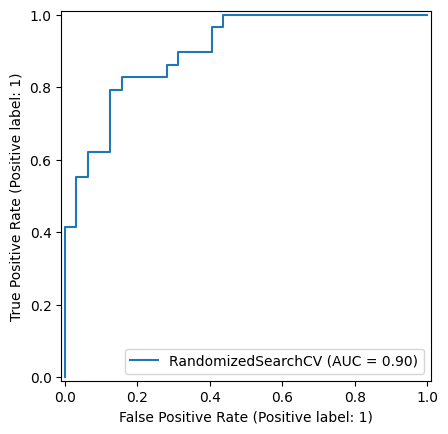

In [34]:
RocCurveDisplay.from_estimator(rscv_rf, X_test, y_test) # AVALIANDO O MODELO COM A CURVA ROC


In [35]:
y_preds = rscv_rf.predict(X_test) # FAZENDO AS PREVISÕES COM O MODELO DE RANDOM FOREST
y_preds

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds)) # MATRIZ DE CONFUSÃO PARA AVALIAR O MODELO

[[23  9]
 [ 5 24]]


Text(8.222222222222223, 0.5, 'Valores Preditos')

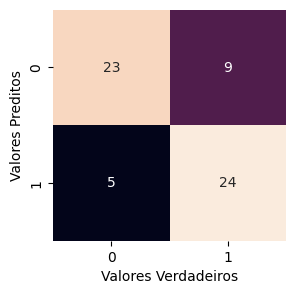

In [37]:
fig, ax = plt.subplots(figsize=(3,3)) # PLOTANDO A MATRIZ DE CONFUSÃO
ax = sns.heatmap(confusion_matrix(y_test, y_preds), # USANDO A FUNÇÃO HEATMAP DO SEABORN PARA PLOTAR A MATRIZ DE CONFUSÃO
                    annot=True, # MOSTRA OS NÚMEROS NA MATRIZ
                    cbar=False) # TIRA A BARRA DE CORES

plt.xlabel("Valores Verdadeiros") # LEGENDAS DO EIXO X
plt.ylabel("Valores Preditos") # LEGENDAS DO EIXO Y

## Relatório de Classificação

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test, y_preds)) # RELATÓRIO DE CLASSIFICAÇÃO PARA AVALIAR O MODELO

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        32
           1       0.73      0.83      0.77        29

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61

